In [2]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random                      # import basic random number generator functions
import seaborn as sns

# Functions

In [3]:
def duration_of_sim (t_start, t_end, dt):
   '''
   input parameters:
      other parameters: time step for simulation , dt : 0.001 (change the dt value as per choice)
      C_m: capacitance per unit area, important to divie the current by capacitance per unit area to get the

   '''
   T = np.arange(t_start, t_end+dt, dt)
   return T
# capacitance per unit area of neuron (microF/cm^2)
C_m=1

# # choose an arbitary t range such as one can model multiple AP (in milliseconds)
# t_min=0
# t_max=1000 # ms (changed from 500 to 1000 for more bursts)
# dt = 0.001 # value 0.01 leads to overflow
# T=np.arange(t_min,t_max+dt,dt)

In [4]:
def generatespikes(V_pre,V_th,T,dt):

    spike=[]
    print(np.dtype(spike))
    # spike_train=[]
    spike_train=np.zeros(len(T))
    i=0
    count=0
    while i < len(T):
        if V_pre[i]>=V_th:

    #         print(V_TC[i+1], i+1)
            spike= np.append(spike,(i)*dt)
            spike_train[i]=1
            i=i+200
            count+=1
            # print(i)
            # if k==len(T):
            #     StopIteration
        i+=1

    return spike_train, spike

In [5]:
#TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

#channel opening rate is given by alpha and closing rate by beta values for all ion channels and is dependent on the membrane potential value
# at each time point (V[i])

def alpha_n_TRN(V):
    '''
    input variables
    V: membrane potential at every time point t

    output variables:
    alpha_n: the opening rate of the potassium gate as a function of membrane potential (V) at each time point t
    '''
    result = 0.032*(15-V)/(np.exp((15-V)/5)-1)
    return result

def beta_n_TRN(V):
    '''
    input variables

    V: membrane potential at every time point t

    output variables:
    beta_n: the closing rate of the potassium gate as a function of membrane potential (V) at each time point t
    '''
    result= 0.5*np.exp((10-V)/40)
    return result

# Na+ rate functions for activation gate
def alpha_m_TRN(V):
    '''
    input variables
    V: membrane potential at every time point t

    output variables:
    alpha_m: the opening rate of the sodium activation gate as a function of membrane potential (V) at each time point t
    '''
    result = 0.32*(13-V)/(np.exp((13-V)/4)-1)
    return result

def beta_m_TRN(V):
    '''
    input variables
    V: membrane potential at every time point t

    output variables:
    beta_m: the closing rate of the sodium activation gate as a function of membrane potential (V) at each time point t
    '''
    result = 0.28*(V-40)/(np.exp((V-40)/5)-1)
    return  result

# Na+ rate functions for inactivation gate
def alpha_h_TRN(V):
    '''
    input variables
    V: membrane potential at every time point t

    output variables:
    alpha_h: the opening rate of the sodium inactivation gate as a function of membrane potential (V) at each time point t
    '''
    result= 0.128*np.exp((17-V)/18)
    return result

def beta_h_TRN(V):
    '''
    input variables
    V: membrane potential at every time point t

    output variables:
    beta_h: the closing rate of the sodium inactivation gate as a function of membrane potential (V) at each time point t
    '''
    result= 4/(1+np.exp((40-V)/5))
    return result

In [6]:
# infinity forms for K and Na channels in both TRN and TC

def n_inf(V):
    result= alpha_n_TRN(V)/(alpha_n_TRN(V)+beta_n_TRN(V))
    return result

def tau_n(V):
    result = 1/(alpha_n_TRN(V)+beta_n_TRN(V))
    return result

def m_inf(V):
    result=alpha_m_TRN(V)/(alpha_m_TRN(V)+beta_m_TRN(V))
    return result

def tau_m(V):
    result = 1/(alpha_m_TRN(V)+beta_m_TRN(V))
    return result

def h_inf(V):
    result=alpha_h_TRN(V)/(alpha_h_TRN(V)+beta_h_TRN(V))
    return result

def tau_h(V):
    result = 1/(alpha_h_TRN(V)+beta_h_TRN(V))
    return result

In [7]:
# T type calcium channels in TRN

#channel ACTIVATION is given by m with the decay constant tau and INACTIVATION by h
# the activation and inactivation depend on membrane potential  ---> all adapted from Destexhe1994 and Soplata17

# ALTER THE half life value of V for different simulations : V+52 or V+80
def m_Ca_inf(V):
    result = 1/(1+np.exp(-(V+52)/7.4))
    return float(result)

def tau_m_Ca(V):
    result= 0.44 + 0.15/(np.exp((V+27)/10) +np.exp(-(V+102)/15))
    return result

def h_Ca_inf(V):
    result= 1/(1+np.exp((V+80)/5))
    return result

def tau_h_Ca(V):
    result= 22.7 + 0.27/(np.exp((V+48)/4) + np.exp(-(V+407)/50))
    return float( result)




# for the calcium dependent channels, the ACTIVATION and INACTIVATION is dependent on the
# calcium concentration which is in turn dependent on I_T current

def m_CAN_inf(Ca_conc,n):
    '''input- Ca_conc- intracellular calcium concentration
                n - the value of power raised to the calcium concentration
                as done in DEstexhe 1994
        out put- m_can_inf'''
    result=20*(np.power(Ca_conc,n))/(20*(np.power(Ca_conc,n))+0.002)
    return result

def tau_m_CAN(Ca_conc,n):
    result= 1/(20*(np.power(Ca_conc,n))+0.002)
    return result

def m_K_Ca_inf(Ca_conc,n):
    result=48*(np.power(Ca_conc,n))/(48*(np.power(Ca_conc,n))+0.03)
    return result

def tau_m_K_Ca(Ca_conc,n):
    result=1/(48*(np.power(Ca_conc,n))+0.03)
    return result

In [8]:
# T type calcium channels in TC

#channel ACTIVATION is given by m with the decay constant tau and INACTIVATION by h
# the activation and inactivation depend on either membrane potential

def m_Ca_TC_inf(V):
    result = 1/(1+np.exp(-(V+57)/6.2))
    return float(result)

def h_Ca_TC_inf(V):
    result= 1/(1+np.exp((V+81)/4))
    return result

def tau_Ca_TC_h(V):
    result= (30.8 +  (211.4+np.exp((V+113.2)/5))/(1+np.exp((V+84)/3.2)))/3.73
    return float( result)

# Hyperpolarization activated current --> Destexhe et al, 1993

def H_TC_inf(V):
    result = 1/(1+np.exp((V+69.8)/6.5))
    return result

def tau_H_S(V):
    result = np.exp((V+183.6)/15.24)   # 15 changed to 30 (deno)
    return result


def tau_H_F(V):
    result = np.exp((V+158.6)/11.2)/(1+np.exp((V+75)/5.5))
    return result

In [9]:
def allconductance(method):

    if method=='soplata17':
        g_TC={}
        g_TC={'g_Na_TC': 90, 'g_K_TC':10, 'g_T_TC': 2, 'g_h_TC': 0.025, 'g_leak_TC': 0.001, 'g_KLeak_TC' : 0.0172, 'g_GABA_A_TC': 0.069 }

        g_TRN={}
        g_TRN= {'g_Na_TRN': 200, 'g_K_TRN':20, 'g_T_TRN': 3, 'g_leak_TRN': 0.05, 'g_KLeak_TRN' : 0.0172, 'g_GABA_A_TRN': 0.069}
        gvalues = np.append(g_TRN, g_TC)
        g_TC= gvalues

    if method=='soplata17 modified gLeak-TRN':
        g_TC={}
        g_TC={'g_Na_TC': 90, 'g_K_TC':10, 'g_T_TC': 2, 'g_h_TC': 0.025, 'g_leak_TC': 0.001, 'g_KLeak_TC' : 0.0172, 'g_GABA_A_TC': 0.069 }

        g_TRN={}
        g_TRN= {'g_Na_TRN': 200, 'g_K_TRN':20, 'g_T_TRN': 3, 'g_leak_TRN': 0.3, 'g_KLeak_TRN' : 0.0172, 'g_GABA_A_TRN': 0.069}
        gvalues = np.append(g_TRN, g_TC)
        g_TC= gvalues

#    if method=='Destexhe93'

In [10]:
def connect_TRN_TC(I_TC, I_TRN, T, C_m, dt, V_L_TRN = -77, g_H=0.015):

    ### TC defining and initialising values

    g_Na_TC=90  #90, destexhe93--> 30
    g_K_TC=10
    g_T_TC=2 #destexhe93--> 1.75   [ 0.50, 0.75, 1, 1.5, 2]
    #g_H=0.015 #0.015#use 0 to remove influence of Ih current,otherwise use 0.015 # DEPENDS??? changed from 0.025 on 8/3/2022 (switch between 0.001 and 0.015) (destexhe93 --> 0.12)
    g_L_TC=0.01 # 0.01 leads to overflow/ changed from 0.001 to 0.01 on 8 March 2022 (Destexhe93-- 0.05)
    # g_KL_TC= 0.0172 #(for a maximal conductance of 5 nS)
    g_KL_TC= 0



    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #Destxhe93 = -86
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100


    # membrane potential at each time point
    V_TC=np.zeros(len(T))
    V_TC[0]=-60   # changed from -60 to -55 on 8/3/2022 as the steady state value in isolated TRN is around -54


    # current contributed by ion channels in each time point
    I_K_TC=np.zeros(len(T)) # Potassium
    I_Na_TC=np.zeros(len(T)) # Sodium
    I_L_TC=np.zeros(len(T))  # Leaky channels
    I_H_TC=np.zeros(len(T))
    I_T_TC=np.zeros(len(T))
    I_KL_TC= np.zeros(len(T))
    I_GABAb= np.zeros(len(T))
    I_GABAa=np.zeros(len(T))
    I_tot_TC= np.zeros(len(T))
    I_syn_TC=np.zeros(len(T))
    I_tot_TC_wsyn= np.zeros(len(T))

    # open probabilities of each channel gates at each time point
    n_TC=np.zeros(len(T))
    m_TC=np.zeros(len(T))
    h_TC=np.zeros(len(T))
    S_H_TC=np.zeros(len(T))
    F_H_TC=np.zeros(len(T))

    tau_TC=np.zeros(len(T))


    # state variables for synaptic current from TRN to TC
    g_GABAb= 0.01          #  0.001 mS/cm^2 ---.  ''' increase GABAb to see if that allows bursting in TC without an external pulse ''' (Destexhe93 - 4 nS, or 0.013 mS/cm2)
    V_GABAb= -95 #mV

    g=np.zeros(len(T))
    r=np.zeros(len(T))

    g[0]=0
    r[0]=0


    #state varaible equation (r,g)
    k1= 0.5 #(mM^-1 ms^-1)
    k2=0.0012 #(ms^-1)
    k3=0.18 #(ms^-1)
    k4= 0.034 #(ms^-1)


    #TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

    #initial rate values for K and Na rate equations
    n_TC[0]=alpha_n_TRN(V_TC[0])/(alpha_n_TRN(V_TC[0])+beta_n_TRN(V_TC[0]))
    m_TC[0]=alpha_m_TRN(V_TC[0])/(alpha_m_TRN(V_TC[0])+beta_m_TRN(V_TC[0]))
    h_TC[0]=alpha_h_TRN(V_TC[0])/(alpha_h_TRN(V_TC[0])+beta_h_TRN(V_TC[0]))
    alpha_S_TC_0= H_TC_inf(V_TC[0])/tau_H_S(V_TC[0])
    beta_S_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_S(V_TC[0])
    S_H_TC[0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= H_TC_inf(V_TC[0])/tau_H_F(V_TC[0])
    beta_F_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_F(V_TC[0])
    F_H_TC[0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)


    #initial rate values for
    m_Ca_TC=np.zeros(len(T))
    h_Ca_TC=np.zeros(len(T))

    m_Ca_TC[0]=m_Ca_TC_inf(0)
    h_Ca_TC[0]=h_Ca_TC_inf(0)



    ### TRN defining and initialising values:

    g_Na_TRN=200   # Na+ channels (200- destexhe93- 100)
    g_K_TRN= 20  # K+ channels ( 15,20,25)
    g_L_TRN= 0.09#0.1#0.3   # leaky channels (destexhe93- 0.05)
    g_T_TRN= 3 # the T type calcium channel (destexhe93- 1.75)

    g_CAN= 0.25 #mS/cm^2
    V_CAN=-20 #mV

    g_K_Ca= 10 #mS/cm^2
    V_K_Ca=-95 #mV

    Ca_conc=np.zeros(len(T))
    Ca_conc[0]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.


    # Initiatlise ionic reversal potential (in mV)
    V_Na_TRN=50 # Na+ channels
    V_K_TRN=-100 # K+ channels
    #V_L_TRN=  -77  # leaky channels, implementing Bazhenov 2002 value =-77 from -90 on 8/3/2022 (destexhe93: -80)
    V_T_TRN=120

    V_TRN=np.zeros(len(T))
    V_TRN[0]=-60


    # current contributed by ion channels in each time point
    I_K_TRN=np.zeros(len(T)) # Potassium
    I_Na_TRN=np.zeros(len(T)) # Sodium
    I_L_TRN=np.zeros(len(T))  # Leaky channels
    I_T_TRN=np.zeros(len(T))
    I_K_Ca=np.zeros(len(T))
    I_CAN=np.zeros(len(T))
    I_AMPA=np.zeros(len(T))
    I_tot_TRN_wsyn=np.zeros(len(T))


    # I_GABAa=np.zeros(len(T))


    n_TRN=np.zeros(len(T))
    m_TRN=np.zeros(len(T))
    h_TRN=np.zeros(len(T))

    #initial rate values for K and Na rate equations
    n_TRN[0]=alpha_n_TRN(V_TRN[0])/(alpha_n_TRN(V_TRN[0])+beta_n_TRN(V_TRN[0]))
    m_TRN[0]=alpha_m_TRN(V_TRN[0])/(alpha_m_TRN(V_TRN[0])+beta_m_TRN(V_TRN[0]))
    h_TRN[0]=alpha_h_TRN(V_TRN[0])/(alpha_h_TRN(V_TRN[0])+beta_h_TRN(V_TRN[0]))

    #initial rate values for
    m_Ca=np.zeros(len(T))
    h_Ca=np.zeros(len(T))
    m_Ca[0]=m_Ca_inf(0)
    h_Ca[0]=h_Ca_inf(0)

    m_CAN=np.zeros(len(T))
    m_K_Ca=np.zeros(len(T))
    m_K_Ca[0]=m_K_Ca_inf(0,2)
    m_CAN[0]=m_CAN_inf(0,2)

    # State variable for synaptic currents
    g_AMPA= 0.4 #mS/cm^2  ((destexhe93- 0.02, or 1nS)
    V_AMPA=0 #mV, reveral potential of AMPA
    tau_AMPA=2 #ms

    g_GABAa=0.069 #mS/cm^2 (from 0.069)
    V_GABAa=-80 #mV, reveral potential of AMPA
    tau_GABAa=5 #ms

    #Current from TC to TRN --> AMPA
    # synaptic currents in TRN --> recurrent GABA_A
    s_AMPA=np.zeros(len(T))
    s_GABAa=np.zeros(len(T))
    s_AMPA[0]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
    s_GABAa[0]=0

    k=np.zeros(len(T))


    #### loop connecting TC and TRN

    for i in range(len(T)-1):

        #### TRN values

        I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN[i]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022)

        I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN[i]-V_Na_TRN)/C_m

        I_L_TRN[i]=g_L_TRN*(V_TRN[i]-V_L_TRN)/C_m



        I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN[i]-V_T_TRN)/C_m

        I_CAN[i]=g_CAN*np.power(m_CAN[i],2)*(V_TRN[i]-V_CAN)/C_m

        I_K_Ca[i]=g_K_Ca*np.power(m_K_Ca[i],2)*(V_TRN[i]-V_K_Ca)/C_m

        #if g_H==0.017 and i>int(535/dt) and i<int(550/dt):
          #I_AMPA[i]=g_AMPA*s_AMPA[i]*(V_TRN[i]-V_AMPA)/C_m + 0.15
        #else:
        I_AMPA[i]=g_AMPA*s_AMPA[i]*(V_TRN[i]-V_AMPA)/C_m
        I_tot_TRN_wsyn[i+1]=I_L_TRN[i]+I_Na_TRN[i]+I_K_TRN[i]+I_T_TRN[i]

        V_TRN[i+1]=(I_TRN[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i]- I_AMPA[i])*dt+V_TRN[i]

        k[i+1]= 5*(1+math.tanh(V_TC[i]/4))

        s_AMPA[i+1]= ((5*(1+math.tanh(V_TC[i]/4))*(1-s_AMPA[i]) - s_AMPA[i]/tau_AMPA)) * dt + s_AMPA[i]



        n_TRN[i+1]=-(n_TRN[i]-n_inf(V_TRN[i]))*dt/tau_n(V_TRN[i]) +n_TRN[i]

        m_TRN[i+1]=-(m_TRN[i]-m_inf(V_TRN[i]))*dt/tau_m(V_TRN[i]) +m_TRN[i]

        h_TRN[i+1]=-(h_TRN[i]-h_inf(V_TRN[i]))*dt/tau_h(V_TRN[i]) +h_TRN[i]

        m_Ca[i+1]=-(m_Ca[i]-m_Ca_inf(V_TRN[i]))*dt/tau_m_Ca(V_TRN[i]) +m_Ca[i]

        h_Ca[i+1]=-(h_Ca[i]-h_Ca_inf(V_TRN[i]))*dt/tau_h_Ca(V_TRN[i]) +h_Ca[i]


        # m_K_Ca[i+1]=-(m_K_Ca[i]-m_K_Ca_inf(Ca_conc[i],2))*dt/tau_m_K_Ca(Ca_conc[i],2) +m_K_Ca[i]
        # m_CAN[i+1]=-(m_CAN[i]-m_CAN_inf(Ca_conc[i],2))*dt/tau_m_CAN(Ca_conc[i],2) +m_CAN[i]


        Ca_conc[i+1]=(max(-10*I_T_TRN[i]/2.96489, 0) + (0.00024-Ca_conc[i])/5)*dt + Ca_conc[i]


        ### TC values

        I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

        I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

        I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

        I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

        I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

        I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m

        I_GABAb[i]= g_GABAb*((np.power(g[i],4))/(np.power(g[i],4)+100))*(V_TC[i]-V_GABAb)/C_m

        I_GABAa[i]= g_GABAa*s_GABAa[i]*(V_TC[i]-V_GABAa)/C_m


        # V_TC[i+1]=(-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i] - I_GABAa[i])*dt+V_TC[i]
        I_tot_TC[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i]+I_GABAb[i] + I_GABAa[i]

        I_tot_TC_wsyn[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i]

        I_syn_TC[i+1]= I_GABAb[i] + I_GABAa[i]

        V_TC[i+1]=(I_TC[i]/C_m-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i] - I_GABAa[i] -I_KL_TC[i])*dt+V_TC[i]

        r[i+1]= (k1*2*(1+math.tanh(V_TRN[i]/4))*(1-r[i])-k2*r[i])*dt + r[i]  # check how to represent these equations with Jorge

        g[i+1]= (k3*r[i] - k4*g[i])*dt +g[i]

        s_GABAa[i+1]= ((5*(1+math.tanh(V_TRN[i]/4))*(1-s_GABAa[i]) - s_GABAa[i]/tau_GABAa)) * dt + s_GABAa[i]

        # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])

        n_TC[i+1]=-(n_TC[i]-n_inf(V_TC[i]))*dt/tau_n(V_TC[i]) +n_TC[i]

        m_TC[i+1]=-(m_TC[i]-m_inf(V_TC[i]))*dt/tau_m(V_TC[i]) +m_TC[i]

        h_TC[i+1]=-(h_TC[i]-h_inf(V_TC[i]))*dt/tau_h(V_TC[i]) +h_TC[i]

        m_Ca_TC[i+1]= m_Ca_TC_inf(V_TC[i+1])

        h_Ca_TC[i+1]=-(h_Ca_TC[i]-h_Ca_TC_inf(V_TC[i]))*dt/tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

        S_H_TC[i+1]= -(S_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_S(V_TC[i]) + S_H_TC[i]

        F_H_TC[i+1]= -(F_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_F(V_TC[i]) + F_H_TC[i]


    I_syn_TRN= I_AMPA




    gnetAMPA=g_AMPA*s_AMPA
    allvariables_TRN = {'Injected current (nA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPAmethod1':I_AMPA, 's_AMPA':s_AMPA, 'I_syn_TRN':I_syn_TRN, 'I_tot_TRN_wsyn':I_tot_TRN_wsyn, 'I_K_TRN':I_K_TRN, 'I_Na_TRN':I_Na_TRN, 'I_L_TRN': I_L_TRN}
    allvariables_TC = {'Injected current (nA)': I_TC, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC, 'Membrane potential (mV)':V_TC, 'I_GABAb': I_GABAb, 'I_GABAa':I_GABAa, 'I_h (nA)':I_H_TC, 'varaiable_GABAb': g, 'state_variable_GABAb': r,'s_GABAa':s_GABAa, 'I_total_TC':I_tot_TC, 'I_tot_TC_wsyn':I_tot_TC_wsyn, 'I_syn_TC':I_syn_TC, 'F_H_TC' : F_H_TC, 'S_H_TC' : S_H_TC}

    # 'slow state variable': S_H_TC, 'fast state variable':F_H_TC,
    #'gnetAMPA': gnetAMPA, 'g_AMPA': g_AMPA

    return allvariables_TRN, allvariables_TC

# gh effect in TC-TRN network

In [13]:
T= duration_of_sim(0,4000,0.01)
I_TRNinput= 0.2*np.ones(len(T))
I_TCinput= 0*np.ones(len(T))

In [14]:
TRN_variables17, TC_variables17 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.017)
TRN_variables15, TC_variables15 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.015)
TRN_variables0, TC_variables0 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.0)
TRN_variables20, TC_variables20 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.02)

<Figure size 640x480 with 0 Axes>

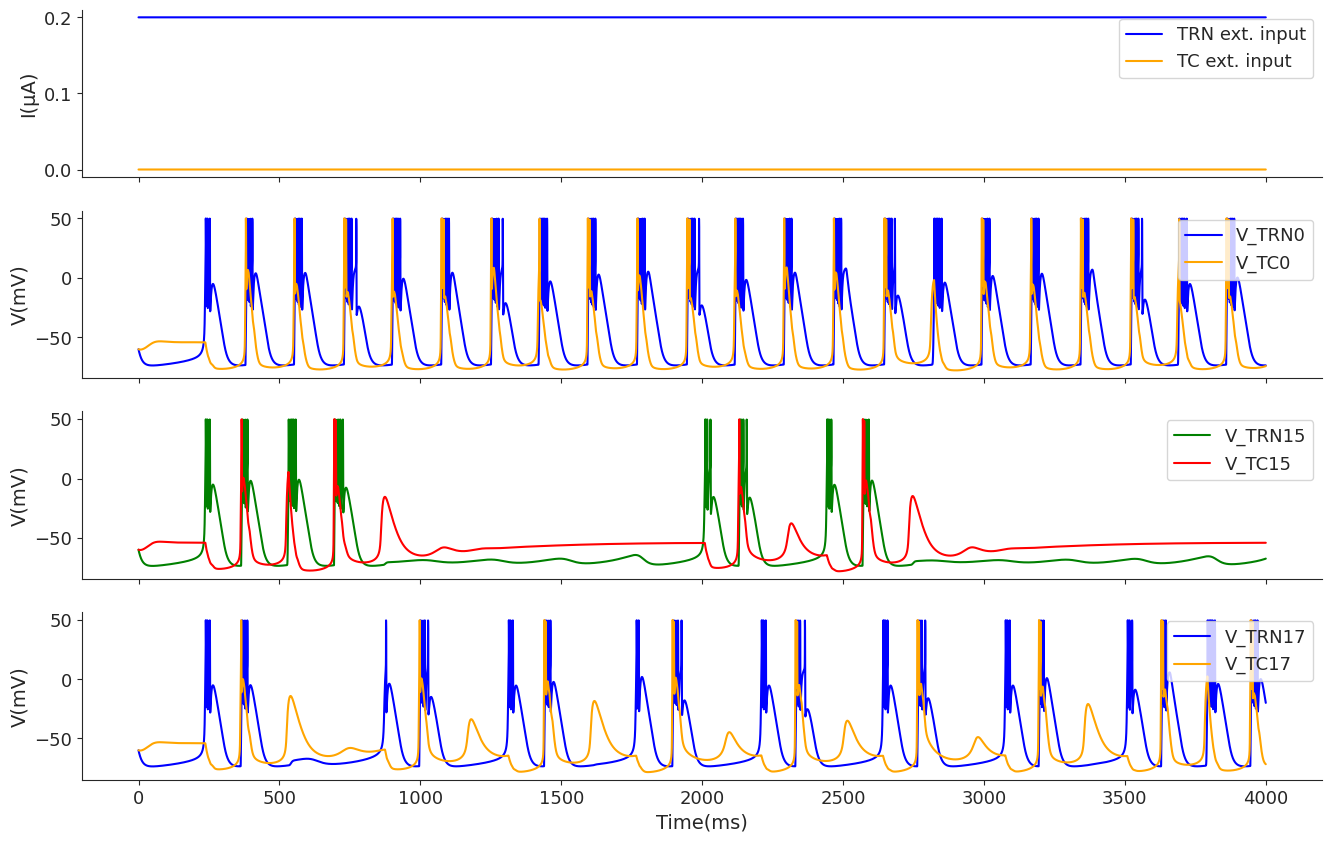

In [15]:
import seaborn as sns
V_TC15= TC_variables15['Membrane potential (mV)']
V_trn15= TRN_variables15['Membrane potential (mV)']
V_TC17= TC_variables17['Membrane potential (mV)']
V_trn17= TRN_variables17['Membrane potential (mV)']
V_TC0= TC_variables0['Membrane potential (mV)']
V_trn0= TRN_variables0['Membrane potential (mV)']

I_GABAa15= TC_variables15['I_GABAa']
I_GABAb15= TC_variables15['I_GABAb']
I_AMPA15= TRN_variables15['I_AMPAmethod1']
I_h_15=TC_variables15['I_h (nA)']
I_GABAa17= TC_variables17['I_GABAa']
I_GABAb17= TC_variables17['I_GABAb']
I_AMPA17= TRN_variables17['I_AMPAmethod1']
I_h_17=TC_variables17['I_h (nA)']

# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(4,1, figsize=(16,10))
plt.subplot(4,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend(loc=1)
plt.plot(T, I_TCinput, label= 'TC ext. input',c='orange' )
plt.legend()
plt.ylabel('I(μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.subplot(4,1,2)

plt.plot(T,V_trn0, label= 'V_TRN0', c='blue')
plt.plot(T, V_TC0, label= 'V_TC0', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)


plt.subplot(4,1,3)

plt.plot(T,V_trn15, label= 'V_TRN15', c='green')
plt.plot(T, V_TC15, label= 'V_TC15', c='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)

plt.subplot(4,1,4)
plt.plot(T,V_trn17, label= 'V_TRN17', c='blue')
plt.plot(T, V_TC17, label= 'V_TC17', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Time(ms)')
plt.ylabel('V(mV)')
plt.legend(loc=1)

(-40.0, 100.0)

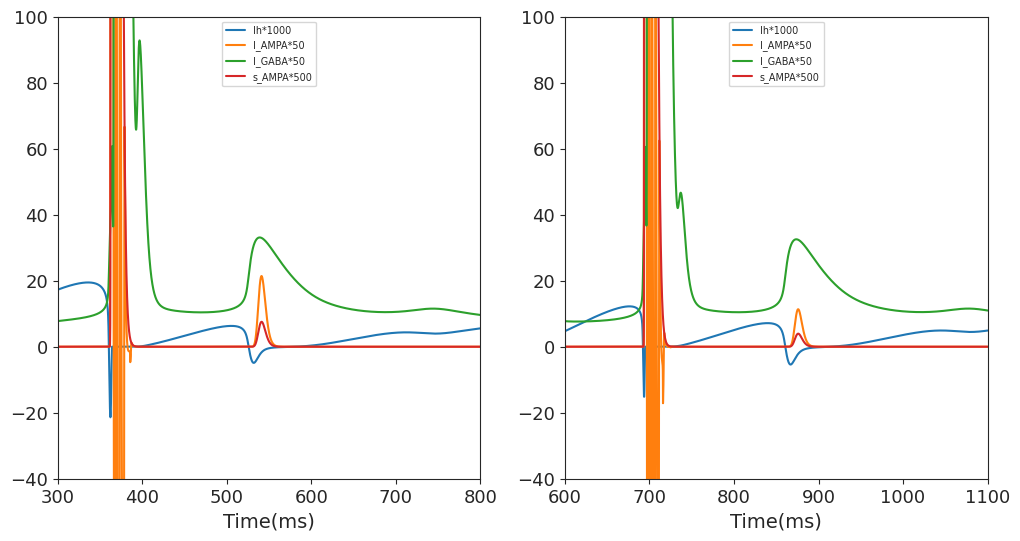

In [16]:
# this block of code zooms in to the intrinsic and synaptic currents

s_AMPA17 = TRN_variables17['s_AMPA']
V_trn17= TRN_variables17['Membrane potential (mV)']
I_syn_TC17= TC_variables17['I_syn_TC']
I_syn_TRN17= TRN_variables17['I_syn_TRN']
V_TC17= TC_variables17['Membrane potential (mV)']
V_trn17= TRN_variables17['Membrane potential (mV)']
I_GABAa17= TC_variables17['I_GABAa']
I_GABAb17= TC_variables17['I_GABAb']
I_AMPA17= TRN_variables17['I_AMPAmethod1']
I_h_17=TC_variables17['I_h (nA)']

s_AMPA15 = TRN_variables15['s_AMPA']
V_TC15= TC_variables15['Membrane potential (mV)']
V_trn15= TRN_variables15['Membrane potential (mV)']
I_GABAa15= TC_variables15['I_GABAa']
I_GABAb15= TC_variables15['I_GABAb']
I_AMPA15= TRN_variables15['I_AMPAmethod1']
I_h_15=TC_variables15['I_h (nA)']
I_syn_TC15= TC_variables15['I_syn_TC']
I_syn_TRN15= TRN_variables15['I_syn_TRN']

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0].plot(T, V_trn17, label = 'V_TRN17')
ax[0].plot(T, -I_h_17*1000, label = 'Ih*1000')
#ax[0].plot(T, -64*np.ones(len(T)), label = 'V=-64')
# ax[0].plot(T, V_TC17, label = 'V_TC17')
ax[0].plot(T, -I_AMPA17*50, label = 'I_AMPA*50')
ax[0].plot(T, I_syn_TC17*50, label = 'I_GABA*50')
ax[0].plot(T, s_AMPA17*500, label = 's_AMPA*500')
ax[0].set_xlabel('Time(ms)')
# ax[0].set_ylabel('I(nA)*multiplier')
ax[0].legend(loc = 9, fontsize='xx-small')
ax[0].set_xlim(300, 800)
ax[0].set_ylim(-40, 100)


# ax[1].plot(T, V_trn15, label = 'V_TRN15')
ax[1].plot(T, -I_h_15*1000, label = 'Ih*1000')
# ax[1].plot(T, -64*np.ones(len(T)),label ='V=-64')
# ax[1].plot(T, V_TC15, label = 'V_TC15')
ax[1].plot(T, -I_AMPA15*50, label = 'I_AMPA*50')
ax[1].plot(T, I_syn_TC15*50, label = 'I_GABA*50')
ax[1].plot(T, s_AMPA15*500, label = 's_AMPA*500')
ax[1].set_xlabel('Time(ms)')
# ax[1].set_ylabel('')
ax[1].legend(loc = 9, fontsize='xx-small')
ax[1].set_xlim(600, 1100)
ax[1].set_ylim(-40, 100)

# FROM HERE I CHANGE I_AMPA IN gh=0.017



In [17]:
def connect_TRN_TC(I_TC, I_TRN, T, C_m, dt, V_L_TRN = -77, g_H=0.015):

    ### TC defining and initialising values

    g_Na_TC=90  #90, destexhe93--> 30
    g_K_TC=10
    g_T_TC=2 #destexhe93--> 1.75   [ 0.50, 0.75, 1, 1.5, 2]
    #g_H=0.015 #0.015#use 0 to remove influence of Ih current,otherwise use 0.015 # DEPENDS??? changed from 0.025 on 8/3/2022 (switch between 0.001 and 0.015) (destexhe93 --> 0.12)
    g_L_TC=0.01 # 0.01 leads to overflow/ changed from 0.001 to 0.01 on 8 March 2022 (Destexhe93-- 0.05)
    # g_KL_TC= 0.0172 #(for a maximal conductance of 5 nS)
    g_KL_TC= 0



    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #Destxhe93 = -86
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100


    # membrane potential at each time point
    V_TC=np.zeros(len(T))
    V_TC[0]=-60   # changed from -60 to -55 on 8/3/2022 as the steady state value in isolated TRN is around -54


    # current contributed by ion channels in each time point
    I_K_TC=np.zeros(len(T)) # Potassium
    I_Na_TC=np.zeros(len(T)) # Sodium
    I_L_TC=np.zeros(len(T))  # Leaky channels
    I_H_TC=np.zeros(len(T))
    I_T_TC=np.zeros(len(T))
    I_KL_TC= np.zeros(len(T))
    I_GABAb= np.zeros(len(T))
    I_GABAa=np.zeros(len(T))
    I_tot_TC= np.zeros(len(T))
    I_syn_TC=np.zeros(len(T))
    I_tot_TC_wsyn= np.zeros(len(T))

    # open probabilities of each channel gates at each time point
    n_TC=np.zeros(len(T))
    m_TC=np.zeros(len(T))
    h_TC=np.zeros(len(T))
    S_H_TC=np.zeros(len(T))
    F_H_TC=np.zeros(len(T))

    tau_TC=np.zeros(len(T))


    # state variables for synaptic current from TRN to TC
    g_GABAb= 0.01          #  0.001 mS/cm^2 ---.  ''' increase GABAb to see if that allows bursting in TC without an external pulse ''' (Destexhe93 - 4 nS, or 0.013 mS/cm2)
    V_GABAb= -95 #mV

    g=np.zeros(len(T))
    r=np.zeros(len(T))

    g[0]=0
    r[0]=0


    #state varaible equation (r,g)
    k1= 0.5 #(mM^-1 ms^-1)
    k2=0.0012 #(ms^-1)
    k3=0.18 #(ms^-1)
    k4= 0.034 #(ms^-1)


    #TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

    #initial rate values for K and Na rate equations
    n_TC[0]=alpha_n_TRN(V_TC[0])/(alpha_n_TRN(V_TC[0])+beta_n_TRN(V_TC[0]))
    m_TC[0]=alpha_m_TRN(V_TC[0])/(alpha_m_TRN(V_TC[0])+beta_m_TRN(V_TC[0]))
    h_TC[0]=alpha_h_TRN(V_TC[0])/(alpha_h_TRN(V_TC[0])+beta_h_TRN(V_TC[0]))
    alpha_S_TC_0= H_TC_inf(V_TC[0])/tau_H_S(V_TC[0])
    beta_S_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_S(V_TC[0])
    S_H_TC[0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= H_TC_inf(V_TC[0])/tau_H_F(V_TC[0])
    beta_F_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_F(V_TC[0])
    F_H_TC[0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)


    #initial rate values for
    m_Ca_TC=np.zeros(len(T))
    h_Ca_TC=np.zeros(len(T))

    m_Ca_TC[0]=m_Ca_TC_inf(0)
    h_Ca_TC[0]=h_Ca_TC_inf(0)



    ### TRN defining and initialising values:

    g_Na_TRN=200   # Na+ channels (200- destexhe93- 100)
    g_K_TRN= 20  # K+ channels ( 15,20,25)
    g_L_TRN= 0.09#0.1#0.3   # leaky channels (destexhe93- 0.05)
    g_T_TRN= 3 # the T type calcium channel (destexhe93- 1.75)

    g_CAN= 0.25 #mS/cm^2
    V_CAN=-20 #mV

    g_K_Ca= 10 #mS/cm^2
    V_K_Ca=-95 #mV

    Ca_conc=np.zeros(len(T))
    Ca_conc[0]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.


    # Initiatlise ionic reversal potential (in mV)
    V_Na_TRN=50 # Na+ channels
    V_K_TRN=-100 # K+ channels
    #V_L_TRN=  -77  # leaky channels, implementing Bazhenov 2002 value =-77 from -90 on 8/3/2022 (destexhe93: -80)
    V_T_TRN=120

    V_TRN=np.zeros(len(T))
    V_TRN[0]=-60


    # current contributed by ion channels in each time point
    I_K_TRN=np.zeros(len(T)) # Potassium
    I_Na_TRN=np.zeros(len(T)) # Sodium
    I_L_TRN=np.zeros(len(T))  # Leaky channels
    I_T_TRN=np.zeros(len(T))
    I_K_Ca=np.zeros(len(T))
    I_CAN=np.zeros(len(T))
    I_AMPA=np.zeros(len(T))
    I_tot_TRN_wsyn=np.zeros(len(T))


    # I_GABAa=np.zeros(len(T))


    n_TRN=np.zeros(len(T))
    m_TRN=np.zeros(len(T))
    h_TRN=np.zeros(len(T))

    #initial rate values for K and Na rate equations
    n_TRN[0]=alpha_n_TRN(V_TRN[0])/(alpha_n_TRN(V_TRN[0])+beta_n_TRN(V_TRN[0]))
    m_TRN[0]=alpha_m_TRN(V_TRN[0])/(alpha_m_TRN(V_TRN[0])+beta_m_TRN(V_TRN[0]))
    h_TRN[0]=alpha_h_TRN(V_TRN[0])/(alpha_h_TRN(V_TRN[0])+beta_h_TRN(V_TRN[0]))

    #initial rate values for
    m_Ca=np.zeros(len(T))
    h_Ca=np.zeros(len(T))
    m_Ca[0]=m_Ca_inf(0)
    h_Ca[0]=h_Ca_inf(0)

    m_CAN=np.zeros(len(T))
    m_K_Ca=np.zeros(len(T))
    m_K_Ca[0]=m_K_Ca_inf(0,2)
    m_CAN[0]=m_CAN_inf(0,2)

    # State variable for synaptic currents
    g_AMPA= 0.4 #mS/cm^2  ((destexhe93- 0.02, or 1nS)
    V_AMPA=0 #mV, reveral potential of AMPA
    tau_AMPA=2 #ms

    g_GABAa=0.069 #mS/cm^2 (from 0.069)
    V_GABAa=-80 #mV, reveral potential of AMPA
    tau_GABAa=5 #ms

    #Current from TC to TRN --> AMPA
    # synaptic currents in TRN --> recurrent GABA_A
    s_AMPA=np.zeros(len(T))
    s_GABAa=np.zeros(len(T))
    s_AMPA[0]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
    s_GABAa[0]=0

    k=np.zeros(len(T))


    #### loop connecting TC and TRN

    for i in range(len(T)-1):

        #### TRN values

        I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN[i]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022)

        I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN[i]-V_Na_TRN)/C_m

        I_L_TRN[i]=g_L_TRN*(V_TRN[i]-V_L_TRN)/C_m



        I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN[i]-V_T_TRN)/C_m

        I_CAN[i]=g_CAN*np.power(m_CAN[i],2)*(V_TRN[i]-V_CAN)/C_m

        I_K_Ca[i]=g_K_Ca*np.power(m_K_Ca[i],2)*(V_TRN[i]-V_K_Ca)/C_m

        if g_H==0.017 and i>int(500/dt) and i<int(580/dt): #i>int(535/dt) and i<int(550/dt):
          I_AMPA[i]=(g_AMPA*s_AMPA[i]*(V_TRN[i]-V_AMPA)/C_m)/2 #+ 0.15
        else:
          I_AMPA[i]=g_AMPA*s_AMPA[i]*(V_TRN[i]-V_AMPA)/C_m
        I_tot_TRN_wsyn[i+1]=I_L_TRN[i]+I_Na_TRN[i]+I_K_TRN[i]+I_T_TRN[i]

        V_TRN[i+1]=(I_TRN[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i]- I_AMPA[i])*dt+V_TRN[i]

        k[i+1]= 5*(1+math.tanh(V_TC[i]/4))

        s_AMPA[i+1]= ((5*(1+math.tanh(V_TC[i]/4))*(1-s_AMPA[i]) - s_AMPA[i]/tau_AMPA)) * dt + s_AMPA[i]



        n_TRN[i+1]=-(n_TRN[i]-n_inf(V_TRN[i]))*dt/tau_n(V_TRN[i]) +n_TRN[i]

        m_TRN[i+1]=-(m_TRN[i]-m_inf(V_TRN[i]))*dt/tau_m(V_TRN[i]) +m_TRN[i]

        h_TRN[i+1]=-(h_TRN[i]-h_inf(V_TRN[i]))*dt/tau_h(V_TRN[i]) +h_TRN[i]

        m_Ca[i+1]=-(m_Ca[i]-m_Ca_inf(V_TRN[i]))*dt/tau_m_Ca(V_TRN[i]) +m_Ca[i]

        h_Ca[i+1]=-(h_Ca[i]-h_Ca_inf(V_TRN[i]))*dt/tau_h_Ca(V_TRN[i]) +h_Ca[i]


        # m_K_Ca[i+1]=-(m_K_Ca[i]-m_K_Ca_inf(Ca_conc[i],2))*dt/tau_m_K_Ca(Ca_conc[i],2) +m_K_Ca[i]
        # m_CAN[i+1]=-(m_CAN[i]-m_CAN_inf(Ca_conc[i],2))*dt/tau_m_CAN(Ca_conc[i],2) +m_CAN[i]


        Ca_conc[i+1]=(max(-10*I_T_TRN[i]/2.96489, 0) + (0.00024-Ca_conc[i])/5)*dt + Ca_conc[i]


        ### TC values

        I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

        I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

        I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

        I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

        I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

        I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m

        I_GABAb[i]= g_GABAb*((np.power(g[i],4))/(np.power(g[i],4)+100))*(V_TC[i]-V_GABAb)/C_m

        I_GABAa[i]= g_GABAa*s_GABAa[i]*(V_TC[i]-V_GABAa)/C_m


        # V_TC[i+1]=(-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i] - I_GABAa[i])*dt+V_TC[i]
        I_tot_TC[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i]+I_GABAb[i] + I_GABAa[i]

        I_tot_TC_wsyn[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i]

        I_syn_TC[i+1]= I_GABAb[i] + I_GABAa[i]

        V_TC[i+1]=(I_TC[i]/C_m-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i] - I_GABAa[i] -I_KL_TC[i])*dt+V_TC[i]

        r[i+1]= (k1*2*(1+math.tanh(V_TRN[i]/4))*(1-r[i])-k2*r[i])*dt + r[i]  # check how to represent these equations with Jorge

        g[i+1]= (k3*r[i] - k4*g[i])*dt +g[i]

        s_GABAa[i+1]= ((5*(1+math.tanh(V_TRN[i]/4))*(1-s_GABAa[i]) - s_GABAa[i]/tau_GABAa)) * dt + s_GABAa[i]

        # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])

        n_TC[i+1]=-(n_TC[i]-n_inf(V_TC[i]))*dt/tau_n(V_TC[i]) +n_TC[i]

        m_TC[i+1]=-(m_TC[i]-m_inf(V_TC[i]))*dt/tau_m(V_TC[i]) +m_TC[i]

        h_TC[i+1]=-(h_TC[i]-h_inf(V_TC[i]))*dt/tau_h(V_TC[i]) +h_TC[i]

        m_Ca_TC[i+1]= m_Ca_TC_inf(V_TC[i+1])

        h_Ca_TC[i+1]=-(h_Ca_TC[i]-h_Ca_TC_inf(V_TC[i]))*dt/tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

        S_H_TC[i+1]= -(S_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_S(V_TC[i]) + S_H_TC[i]

        F_H_TC[i+1]= -(F_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_F(V_TC[i]) + F_H_TC[i]


    I_syn_TRN= I_AMPA




    gnetAMPA=g_AMPA*s_AMPA
    allvariables_TRN = {'Injected current (nA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPAmethod1':I_AMPA, 's_AMPA':s_AMPA, 'I_syn_TRN':I_syn_TRN, 'I_tot_TRN_wsyn':I_tot_TRN_wsyn, 'I_K_TRN':I_K_TRN, 'I_Na_TRN':I_Na_TRN, 'I_L_TRN': I_L_TRN}
    allvariables_TC = {'Injected current (nA)': I_TC, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC, 'Membrane potential (mV)':V_TC, 'I_GABAb': I_GABAb, 'I_GABAa':I_GABAa, 'I_h (nA)':I_H_TC, 'varaiable_GABAb': g, 'state_variable_GABAb': r,'s_GABAa':s_GABAa, 'I_total_TC':I_tot_TC, 'I_tot_TC_wsyn':I_tot_TC_wsyn, 'I_syn_TC':I_syn_TC, 'F_H_TC' : F_H_TC, 'S_H_TC' : S_H_TC}

    # 'slow state variable': S_H_TC, 'fast state variable':F_H_TC,
    #'gnetAMPA': gnetAMPA, 'g_AMPA': g_AMPA

    return allvariables_TRN, allvariables_TC

In [18]:
TRN_variables17, TC_variables17 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.017)
TRN_variables15, TC_variables15 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.015)
#TRN_variables0, TC_variables0 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.0)
#TRN_variables20, TC_variables20 = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01, g_H = 0.02)


<Figure size 640x480 with 0 Axes>

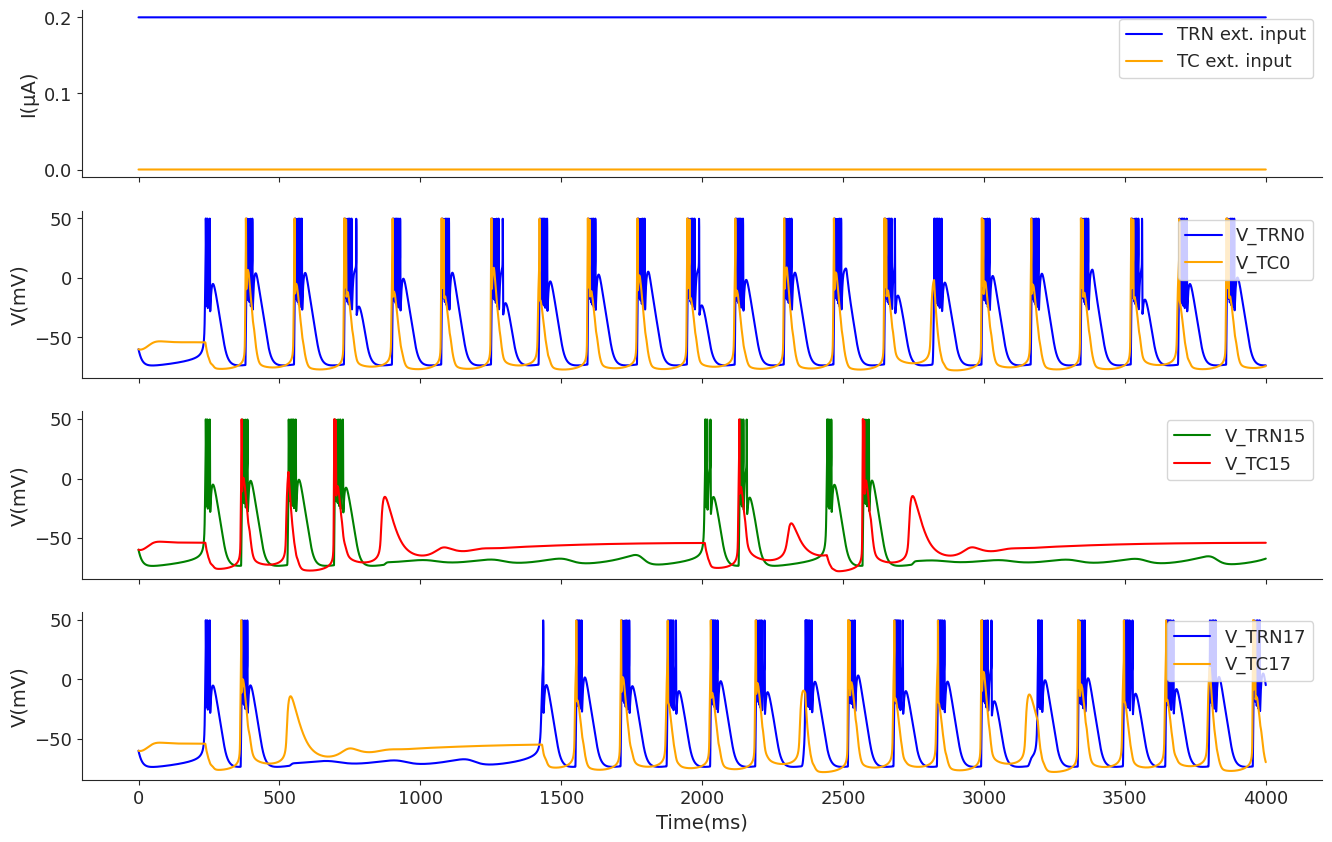

In [19]:
import seaborn as sns
V_TC15= TC_variables15['Membrane potential (mV)']
V_trn15= TRN_variables15['Membrane potential (mV)']
V_TC17= TC_variables17['Membrane potential (mV)']
V_trn17= TRN_variables17['Membrane potential (mV)']
V_TC0= TC_variables0['Membrane potential (mV)']
V_trn0= TRN_variables0['Membrane potential (mV)']

I_GABAa15= TC_variables15['I_GABAa']
I_GABAb15= TC_variables15['I_GABAb']
I_AMPA15= TRN_variables15['I_AMPAmethod1']
I_h_15=TC_variables15['I_h (nA)']
I_GABAa17= TC_variables17['I_GABAa']
I_GABAb17= TC_variables17['I_GABAb']
I_AMPA17= TRN_variables17['I_AMPAmethod1']
I_h_17=TC_variables17['I_h (nA)']

# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(4,1, figsize=(16,10))
plt.subplot(4,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend(loc=1)
# plt.xlim(0,800)
plt.plot(T, I_TCinput, label= 'TC ext. input',c='orange' )
plt.legend()
# plt.xlim(0,800)
plt.ylabel('I(μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.title(' timely revival of bursts to mimic sppindles - input 155ms for 20 ms and 6s for 20 ms ')
plt.subplot(4,1,2)

plt.plot(T,V_trn0, label= 'V_TRN0', c='blue')
plt.plot(T, V_TC0, label= 'V_TC0', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)


plt.subplot(4,1,3)

plt.plot(T,V_trn15, label= 'V_TRN15', c='green')
plt.plot(T, V_TC15, label= 'V_TC15', c='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)


plt.subplot(4,1,4)
plt.plot(T,V_trn17, label= 'V_TRN17', c='blue')
plt.plot(T, V_TC17, label= 'V_TC17', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.xticks(color='w')
plt.xlabel('Time(ms)')
plt.ylabel('V(mV)')
plt.legend(loc=1)

print("Voila gh=0.017 has afterdepolarization")

(-40.0, 100.0)

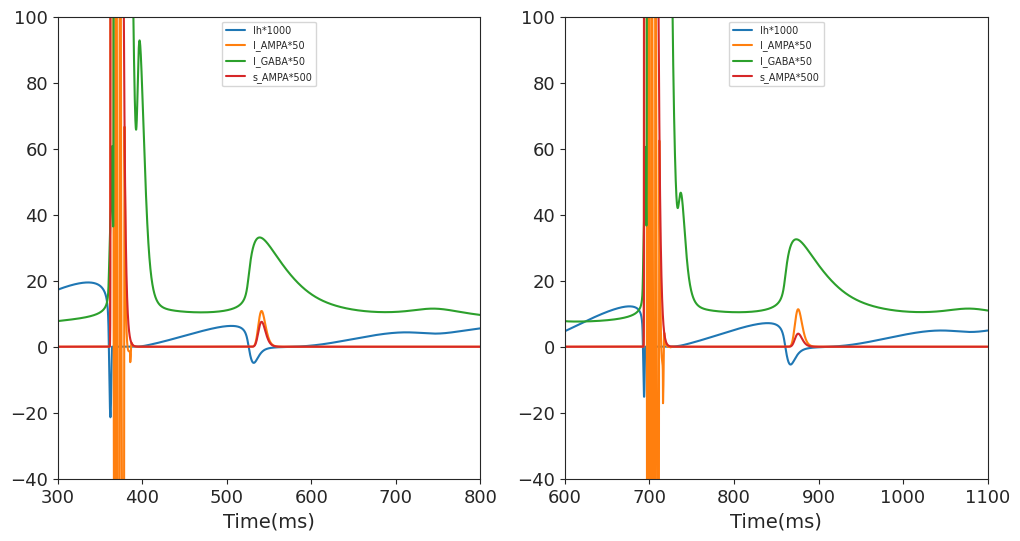

In [21]:
# plot intrinsic and synaptic currents again
s_AMPA17 = TRN_variables17['s_AMPA']
V_trn17= TRN_variables17['Membrane potential (mV)']
I_syn_TC17= TC_variables17['I_syn_TC']
I_syn_TRN17= TRN_variables17['I_syn_TRN']
V_TC17= TC_variables17['Membrane potential (mV)']
V_trn17= TRN_variables17['Membrane potential (mV)']
I_GABAa17= TC_variables17['I_GABAa']
I_GABAb17= TC_variables17['I_GABAb']
I_AMPA17= TRN_variables17['I_AMPAmethod1']
I_h_17=TC_variables17['I_h (nA)']

s_AMPA15 = TRN_variables15['s_AMPA']
V_TC15= TC_variables15['Membrane potential (mV)']
V_trn15= TRN_variables15['Membrane potential (mV)']
I_GABAa15= TC_variables15['I_GABAa']
I_GABAb15= TC_variables15['I_GABAb']
I_AMPA15= TRN_variables15['I_AMPAmethod1']
I_h_15=TC_variables15['I_h (nA)']
I_syn_TC15= TC_variables15['I_syn_TC']
I_syn_TRN15= TRN_variables15['I_syn_TRN']


# plt.plot(T, V_trn17, label = 'V_TRN17')
# plt.plot(T, -I_h_17*1000, label = 'Ih')
# plt.plot(T, -64*np.ones(len(T)), label = 'V=-64')
# plt.plot(T, V_TC17, label = 'V_TC17')
# plt.plot(T, -I_AMPA17*100, label = 'IAMPA*100')
# plt.plot(T, I_syn_TC17*100, label = 'IGABA*100')
# plt.legend(loc = 9, fontsize='small')
# plt.xlim(300, 960)
# plt.ylim(-90, 70)
fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0].plot(T, V_trn17, label = 'V_TRN17')
ax[0].plot(T, -I_h_17*1000, label = 'Ih*1000')
#ax[0].plot(T, -64*np.ones(len(T)), label = 'V=-64')
# ax[0].plot(T, V_TC17, label = 'V_TC17')
ax[0].plot(T, -I_AMPA17*50, label = 'I_AMPA*50')
ax[0].plot(T, I_syn_TC17*50, label = 'I_GABA*50')
ax[0].plot(T, s_AMPA17*500, label = 's_AMPA*500')
ax[0].set_xlabel('Time(ms)')
# ax[0].set_ylabel('I(nA)*multiplier')
ax[0].legend(loc = 9, fontsize='xx-small')
ax[0].set_xlim(300, 800)
ax[0].set_ylim(-40, 100)


# ax[1].plot(T, V_trn15, label = 'V_TRN15')
ax[1].plot(T, -I_h_15*1000, label = 'Ih*1000')
# ax[1].plot(T, -64*np.ones(len(T)),label ='V=-64')
# ax[1].plot(T, V_TC15, label = 'V_TC15')
ax[1].plot(T, -I_AMPA15*50, label = 'I_AMPA*50')
ax[1].plot(T, I_syn_TC15*50, label = 'I_GABA*50')
ax[1].plot(T, s_AMPA15*500, label = 's_AMPA*500')
ax[1].set_xlabel('Time(ms)')
# ax[1].set_ylabel('')
ax[1].legend(loc = 9, fontsize='xx-small')
ax[1].set_xlim(600, 1100)
ax[1].set_ylim(-40, 100)